### A. Dataset Tipe 1 (20%)

#### A.1. Upload dataset dan visualisasikan/ploting.

Sesuikan dataset dan running ulang code berikut.

In [8]:
import pandas as pd

data = pd.read_excel("type_1_15.xlsx") #ganti sesuai dataset

X = data[["Feature_0", "Feature_1"]].values
y = data["Label"].values  



import

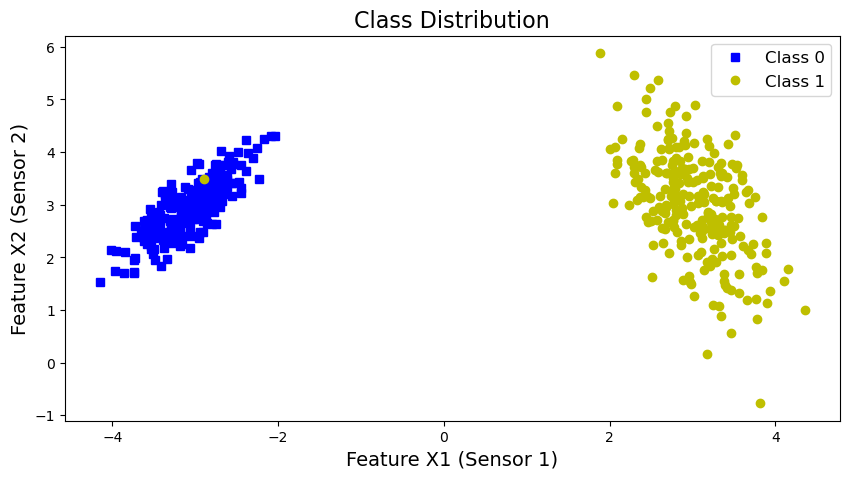

In [9]:
import matplotlib.pyplot as plt
import numpy as np
# Visualization
plt.figure(figsize=(10, 5))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Class 0")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Class 1")
if len(np.unique(y)) > 2:  # If there is a third class
    plt.plot(X[y == 2, 0], X[y == 2, 1], "k+", label="Class 2")

plt.legend(fontsize=12)
plt.xlabel("Feature X1 (Sensor 1)", fontsize=14)
plt.ylabel("Feature X2 (Sensor 2)", fontsize=14)
plt.title("Class Distribution", fontsize=16)
plt.show()

####  A.2. Lakukan pembagian data menjadi data latih (80%) dan data uji (20%).

In [12]:
from sklearn.model_selection import train_test_split

In [13]:

# Memisahkan fitur dan label
X = data[["Feature_0", "Feature_1"]].values  
y = data["Label"].values                     

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifikasi ukuran data
print(f"Ukuran data latih: {len(X_train)}")
print(f"Ukuran data uji: {len(X_test)}")

Ukuran data latih: 400
Ukuran data uji: 100


####  A.3. Membuat model SVM linier dengan mengeset hyperparameter khusus kernel linier.

- Evaluasi performa model menggunakan metrik:Akurasi Model, Confusion Matrix,Classification Report (Precision, Recall, F1-Score).
- Visualisasikan hasil model, seperti decision boundary jika memungkinkan (untuk dataset 2D).

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



Akurasi Model: 1.0
Confusion Matrix:
 [[42  0]
 [ 0 58]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        58

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



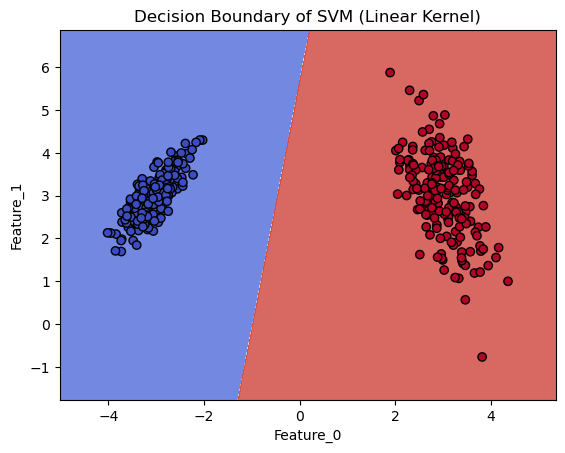

In [15]:
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train, y_train)

# Prediksi data uji
y_pred = model.predict(X_test)

# Evaluasi performa model
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualisasi Decision Boundary (untuk dataset 2D)
def plot_decision_boundary(X, y, model):
    # Membuat grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Prediksi untuk setiap titik grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title("Decision Boundary of SVM (Linear Kernel)")
    plt.xlabel("Feature_0")
    plt.ylabel("Feature_1")
    plt.show()

plot_decision_boundary(X_train, y_train, model)

####  A4. Membuat model SVM linier dengan mengeset hyperparameter khusus kernel non linier.

 ####  A.4.1 SVM non linier polynomial.
 diminta untuk menggunakan kernel Polynomial. Anda memutuskan untuk menggunakan langkah-langkah berikut ini. (Catatan: parameter Orde dan hyperparameter $C$ bisa ditentukan oleh masing-masing kelompok sehingga diperoleh kinerja akurasi yang baik).

- Evaluasi performa model menggunakan metrik:Akurasi Model, Confusion Matrix,Classification Report (Precision, Recall, F1-Score).
- Visualisasikan hasil model, seperti decision boundary jika memungkinkan (untuk dataset 2D).

Akurasi Model: 1.0
Confusion Matrix:
 [[42  0]
 [ 0 58]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        58

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



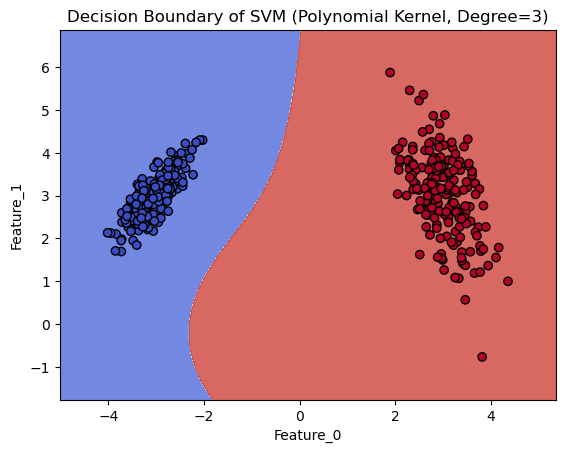

In [16]:
# Membuat model SVM dengan kernel Polynomial
degree = 3  # Orde polinomial
C = 1.0     # Hyperparameter regularisasi
model = SVC(kernel='poly', degree=degree, C=C, random_state=42)
model.fit(X_train, y_train)

# Prediksi data uji
y_pred = model.predict(X_test)

# Evaluasi performa model
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualisasi Decision Boundary (untuk dataset 2D)
def plot_decision_boundary(X, y, model):
    # Membuat grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Prediksi untuk setiap titik grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(f"Decision Boundary of SVM (Polynomial Kernel, Degree={degree})")
    plt.xlabel("Feature_0")
    plt.ylabel("Feature_1")
    plt.show()
    
plot_decision_boundary(X_train, y_train, model)

 ####  A.4.2 SVM non linier similarity fitur
 Diminta untuk menggunakan kernel Radial Basis Function (RBF). Anda memutuskan untuk menggunakan langkah-langkah berikut ini. (Catatan: parameter Gamma ($\gamma$) dan hyperparameter $C$ bisa ditentukan oleh masing-masing kelompok sehingga diperoleh kinerja akurasi yang baik).
 - Evaluasi performa model menggunakan metrik:Akurasi Model, Confusion Matrix,Classification Report (Precision, Recall, F1-Score).
- Visualisasikan hasil model, seperti decision boundary jika memungkinkan (untuk dataset 2D).

Akurasi Model: 1.0
Confusion Matrix:
 [[42  0]
 [ 0 58]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        58

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



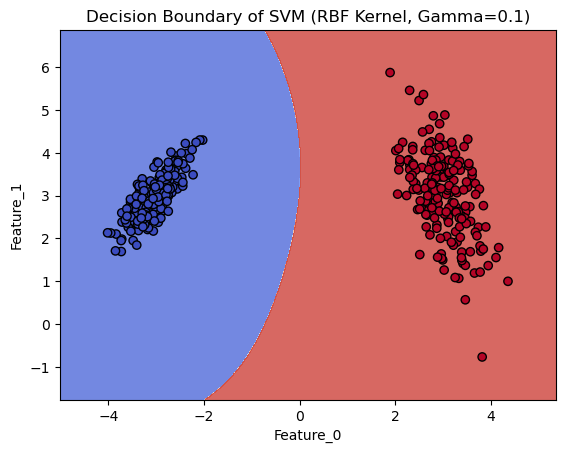

In [17]:
# Membuat model SVM dengan kernel RBF
gamma = 0.1  # Parameter gamma
C = 1.0      # Hyperparameter regularisasi
model = SVC(kernel='rbf', gamma=gamma, C=C, random_state=42)
model.fit(X_train, y_train)

# Prediksi data uji
y_pred = model.predict(X_test)

# Evaluasi performa model
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualisasi Decision Boundary (untuk dataset 2D)
def plot_decision_boundary(X, y, model):
    # Membuat grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Prediksi untuk setiap titik grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(f"Decision Boundary of SVM (RBF Kernel, Gamma={gamma})")
    plt.xlabel("Feature_0")
    plt.ylabel("Feature_1")
    plt.show()

plot_decision_boundary(X_train, y_train, model)

####  A.5. Analisis model SVM dataset 1 

Dari 3 dan 4 percobaan training diatas, dataset yang kalian dapatkan akan menemukan solusi yang terbaik jika menggunakan model SVM linier atau non linier. Fitting lagi model terbaik diatas.

Berdasarkan hasil percobaan yang telah dilakukan, model Support Vector Machine (SVM) dengan kernel Linear maupun Non-Linear menunjukkan tingkat akurasi yang serupa, tanpa perbedaan signifikan dalam performa keduanya. Temuan ini memberikan indikasi kuat bahwa untuk dataset spesifik yang digunakan dalam penelitian ini, baik model SVM dengan kernel Linear maupun Non-Linear dapat dianggap sebagai solusi terbaik yang mampu memberikan hasil optimal. Dengan kata lain, pemilihan antara kedua model tersebut tidak memengaruhi kualitas hasil analisis, sehingga keduanya sama-sama efektif dalam menyelesaikan permasalahan yang telah diidentifikasi.

Akurasi Model: 1.0
Confusion Matrix:
 [[42  0]
 [ 0 58]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        58

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



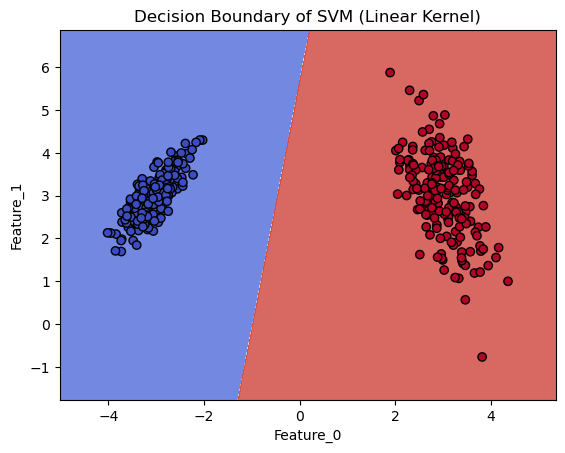

In [18]:
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train, y_train)

# Prediksi data uji
y_pred = model.predict(X_test)

# Evaluasi performa model
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualisasi Decision Boundary (untuk dataset 2D)
def plot_decision_boundary(X, y, model):
    # Membuat grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Prediksi untuk setiap titik grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title("Decision Boundary of SVM (Linear Kernel)")
    plt.xlabel("Feature_0")
    plt.ylabel("Feature_1")
    plt.show()

plot_decision_boundary(X_train, y_train, model)

Akurasi Model: 1.0
Confusion Matrix:
 [[42  0]
 [ 0 58]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        58

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



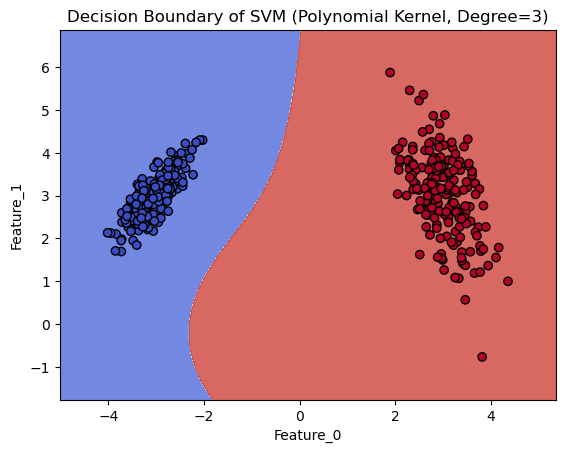

In [19]:
model = SVC(kernel='poly', degree=degree, C=C, random_state=42)
model.fit(X_train, y_train)

# Prediksi data uji
y_pred = model.predict(X_test)

# Evaluasi performa model
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualisasi Decision Boundary (untuk dataset 2D)
def plot_decision_boundary(X, y, model):
    # Membuat grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Prediksi untuk setiap titik grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(f"Decision Boundary of SVM (Polynomial Kernel, Degree={degree})")
    plt.xlabel("Feature_0")
    plt.ylabel("Feature_1")
    plt.show()
    
plot_decision_boundary(X_train, y_train, model)

Akurasi Model Terbaik: 1.0
Confusion Matrix:
 [[42  0]
 [ 0 58]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        58

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



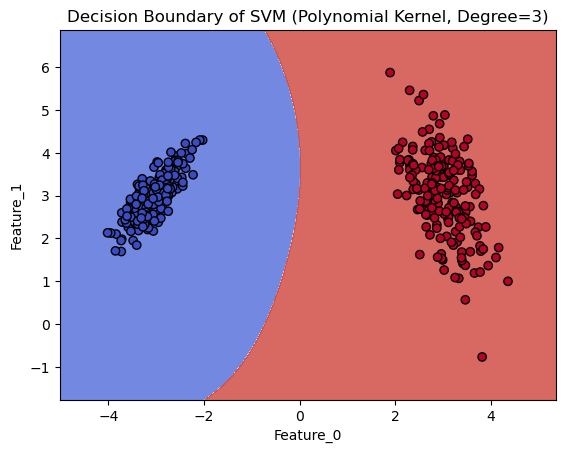

In [20]:
# Fitting ulang model terbaik (contoh: SVM dengan kernel RBF)
best_model = SVC(kernel='rbf', gamma=0.1, C=1.0, random_state=42)
best_model.fit(X_train, y_train)

# Evaluasi ulang pada data uji
y_pred = best_model.predict(X_test)

print("Akurasi Model Terbaik:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualisasi Decision Boundary untuk model terbaik
plot_decision_boundary(X_train, y_train, best_model)

### B. Dataset Tipe 2 (20%)

####  B.1. Upload dataset dan visualisasikan/ploting.

Sesuikan dataset dan running ulang code berikut.

In [22]:
import pandas as pd

data = pd.read_excel("type_2_15.xlsx") #ganti sesuai dataset

X = data[["Feature_0", "Feature_1"]].values
y = data["Label"].values  


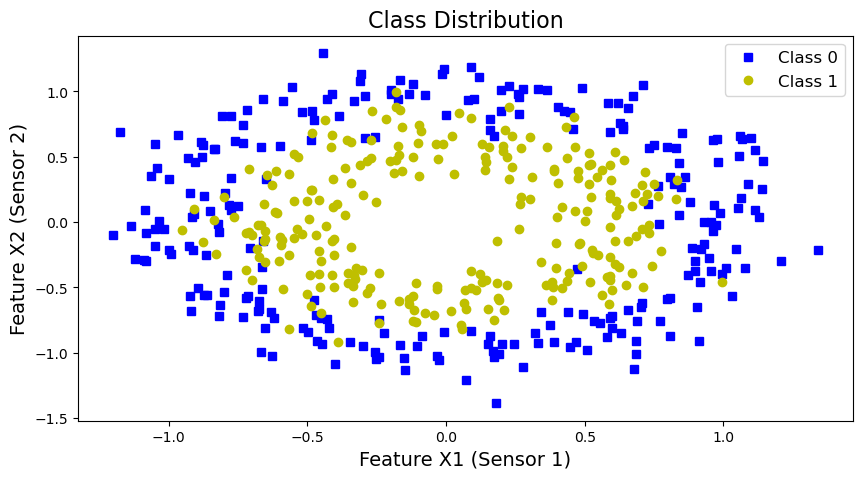

In [26]:
import matplotlib.pyplot as plt
import numpy as np
# Visualization
plt.figure(figsize=(10, 5))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Class 0")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Class 1")
if len(np.unique(y)) > 2:  # If there is a third class
    plt.plot(X[y == 2, 0], X[y == 2, 1], "k+", label="Class 2")

plt.legend(fontsize=12)
plt.xlabel("Feature X1 (Sensor 1)", fontsize=14)
plt.ylabel("Feature X2 (Sensor 2)", fontsize=14)
plt.title("Class Distribution", fontsize=16)
plt.show()

####  B.2. Lakukan pembagian data menjadi data latih (80%) dan data uji (20%).

In [23]:
X = data[["Feature_0", "Feature_1"]].values  
y = data["Label"].values                     

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifikasi ukuran data
print(f"Ukuran data latih: {len(X_train)}")
print(f"Ukuran data uji: {len(X_test)}")

Ukuran data latih: 400
Ukuran data uji: 100


####  B.3. Membuat model SVM linier dengan mengeset hyperparameter khusus kernel linier.

- Evaluasi performa model menggunakan metrik:Akurasi Model, Confusion Matrix,Classification Report (Precision, Recall, F1-Score).
- Visualisasikan hasil model, seperti decision boundary jika memungkinkan (untuk dataset 2D).

Akurasi Model: 0.45
Confusion Matrix:
 [[18 34]
 [21 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.35      0.40        52
           1       0.44      0.56      0.50        48

    accuracy                           0.45       100
   macro avg       0.45      0.45      0.45       100
weighted avg       0.45      0.45      0.44       100



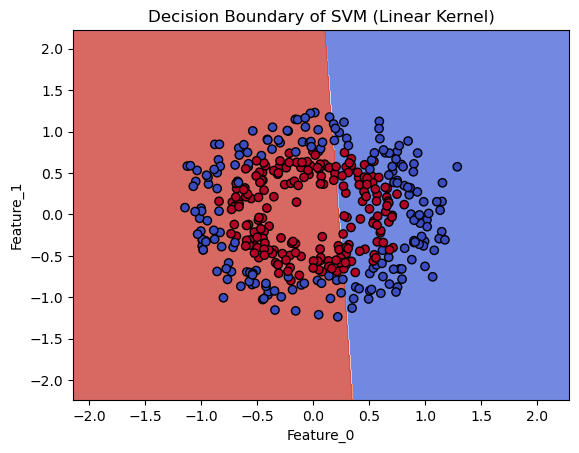

In [24]:
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train, y_train)

# Prediksi data uji
y_pred = model.predict(X_test)

# Evaluasi performa model
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualisasi Decision Boundary (untuk dataset 2D)
def plot_decision_boundary(X, y, model):
    # Membuat grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Prediksi untuk setiap titik grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title("Decision Boundary of SVM (Linear Kernel)")
    plt.xlabel("Feature_0")
    plt.ylabel("Feature_1")
    plt.show()

plot_decision_boundary(X_train, y_train, model)

####  B.4. Membuat model SVM linier dengan mengeset hyperparameter khusus kernel non linier.

 ####  B.4.1 SVM non linier polynomial.
 diminta untuk menggunakan kernel Polynomial. Anda memutuskan untuk menggunakan langkah-langkah berikut ini. (Catatan: parameter Orde dan hyperparameter $C$ bisa ditentukan oleh masing-masing kelompok sehingga diperoleh kinerja akurasi yang baik).

- Evaluasi performa model menggunakan metrik:Akurasi Model, Confusion Matrix,Classification Report (Precision, Recall, F1-Score).
- Visualisasikan hasil model, seperti decision boundary jika memungkinkan (untuk dataset 2D).

Akurasi Model: 0.62
Confusion Matrix:
 [[14 38]
 [ 0 48]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.27      0.42        52
           1       0.56      1.00      0.72        48

    accuracy                           0.62       100
   macro avg       0.78      0.63      0.57       100
weighted avg       0.79      0.62      0.56       100



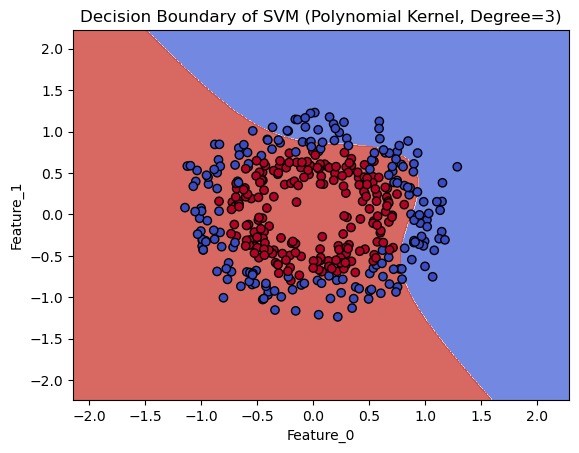

In [25]:
# Membuat model SVM dengan kernel Polynomial
degree = 3  # Orde polinomial
C = 1.0     # Hyperparameter regularisasi
model = SVC(kernel='poly', degree=degree, C=C, random_state=42)
model.fit(X_train, y_train)

# Prediksi data uji
y_pred = model.predict(X_test)

# Evaluasi performa model
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualisasi Decision Boundary (untuk dataset 2D)
def plot_decision_boundary(X, y, model):
    # Membuat grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Prediksi untuk setiap titik grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(f"Decision Boundary of SVM (Polynomial Kernel, Degree={degree})")
    plt.xlabel("Feature_0")
    plt.ylabel("Feature_1")
    plt.show()
    
plot_decision_boundary(X_train, y_train, model)

 ####  B.4.2 SVM non linier similarity fitur
 Diminta untuk menggunakan kernel Radial Basis Function (RBF). Anda memutuskan untuk menggunakan langkah-langkah berikut ini. (Catatan: parameter Gamma ($\gamma$) dan hyperparameter $C$ bisa ditentukan oleh masing-masing kelompok sehingga diperoleh kinerja akurasi yang baik).
 - Evaluasi performa model menggunakan metrik:Akurasi Model, Confusion Matrix,Classification Report (Precision, Recall, F1-Score).
- Visualisasikan hasil model, seperti decision boundary jika memungkinkan (untuk dataset 2D).

Akurasi Model: 0.88
Confusion Matrix:
 [[40 12]
 [ 0 48]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.77      0.87        52
           1       0.80      1.00      0.89        48

    accuracy                           0.88       100
   macro avg       0.90      0.88      0.88       100
weighted avg       0.90      0.88      0.88       100



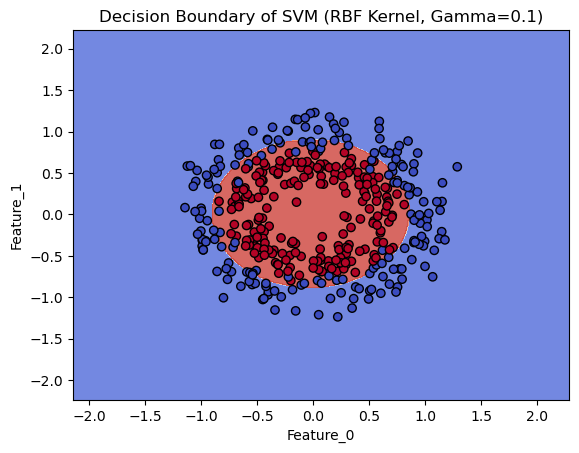

In [26]:
# Membuat model SVM dengan kernel RBF
gamma = 0.1  # Parameter gamma
C = 1.0      # Hyperparameter regularisasi
model = SVC(kernel='rbf', gamma=gamma, C=C, random_state=42)
model.fit(X_train, y_train)

# Prediksi data uji
y_pred = model.predict(X_test)

# Evaluasi performa model
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualisasi Decision Boundary (untuk dataset 2D)
def plot_decision_boundary(X, y, model):
    # Membuat grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Prediksi untuk setiap titik grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(f"Decision Boundary of SVM (RBF Kernel, Gamma={gamma})")
    plt.xlabel("Feature_0")
    plt.ylabel("Feature_1")
    plt.show()

plot_decision_boundary(X_train, y_train, model)

####  B.5. Analisis model SVM dataset 2

Dari 3 dan 4 percobaan training diatas, dataset yang kalian dapatkan akan menemukan solusi yang terbaik jika menggunakan model SVM linier atau non linier. Fitting lagi model terbaik diatas.

Berdasarkan hasil dari empat percobaan pelatihan yang telah dilakukan, solusi terbaik adalah dengan menggunakan model SVM Non-Linear Similarity. Model ini berhasil mencapai tingkat akurasi sebesar 88%, yang merupakan nilai tertinggi dibandingkan dengan model lainnya. Oleh karena itu, model SVM Non-Linear Similarity dapat dianggap sebagai pilihan paling optimal untuk menganalisis data dalam memneliti data ini, mengingat keunggulannya dalam menghasilkan performa terbaik.

Akurasi Model: 0.88
Confusion Matrix:
 [[40 12]
 [ 0 48]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.77      0.87        52
           1       0.80      1.00      0.89        48

    accuracy                           0.88       100
   macro avg       0.90      0.88      0.88       100
weighted avg       0.90      0.88      0.88       100



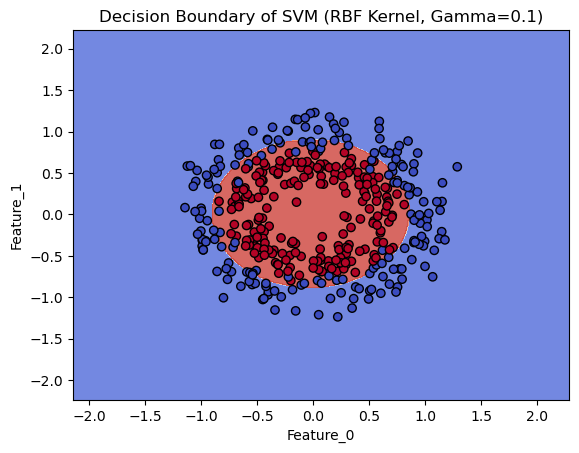

In [27]:
# Membuat model SVM dengan kernel RBF
gamma = 0.1  # Parameter gamma
C = 1.0      # Hyperparameter regularisasi
model = SVC(kernel='rbf', gamma=gamma, C=C, random_state=42)
model.fit(X_train, y_train)

# Prediksi data uji
y_pred = model.predict(X_test)

# Evaluasi performa model
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualisasi Decision Boundary (untuk dataset 2D)
def plot_decision_boundary(X, y, model):
    # Membuat grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Prediksi untuk setiap titik grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(f"Decision Boundary of SVM (RBF Kernel, Gamma={gamma})")
    plt.xlabel("Feature_0")
    plt.ylabel("Feature_1")
    plt.show()

plot_decision_boundary(X_train, y_train, model)

## 2. Unsupervised Learning (30%)

## Ketentuan dataset 

Dataset untuk setiap kelompok berbeda-beda disesuaikan nama file dataset di google drive berikut:
https://telkomuniversityofficial-my.sharepoint.com/:f:/g/personal/istiqomah_telkomuniversity_ac_id/Eokn38UqWu5PlejV3lQ4He0B7elTTGP2AWRsGfjqfiMpag?e=9QAPRO

##### Soal #####
Metode yang digunakan untuk disesuaikan dengan dataset dari masing-masing kelompok.
1. Ploting dataset dengan menggunakan scatter.
2. Carilah jumlah klaster jika kalian menggunakan metode k-means dan gaussian maxture, atau carilah nilai epsilon (eps) dan minimal naigborhood (min_samples). Lakukan training bekali-kali dengan mengganti jumlah claster lalu buat grafik inertia atau grafik Silhouette score untuk metode kmeans atau grafik BIC dan AIC  untuk gaussian mixture dan tentukan jumlah cluster yang tepat. Lakukan training bekali-kali dengan mengganti dengan mengganti nilai epsilon (eps) dan minimal naigborhood (min_samples) untuk dbscans.
3. Lakukan process training kembali dengan jumlah cluster yang telah ditentukan di point Kedua.
4. Ploting hasil clastering dan analisis apakah pemilihan metode sudah tepat sesuai dengan karakteristik dataset kelompok masing-masing.

### 1. Load dataset & visualisasi data

         X1        X2
0 -5.253490 -9.343051
1  0.189945 -5.154175
2 -6.697694 -7.395456
3 -3.744242 -9.511533
4  0.283140 -5.965952


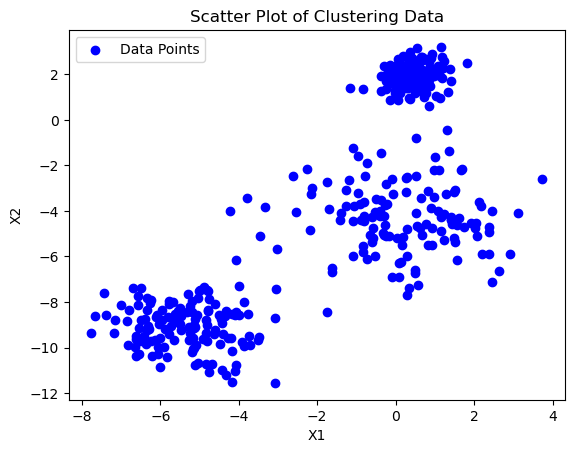

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

namafile = 'clustering_data15_.csv'
data_train = pd.read_csv(namafile)

#plot
# Menampilkan beberapa baris awal data untuk memahami struktur
print(data_train.head())

# Asumsi kolom dataset (ganti sesuai dengan kolom Anda)
# Kolom 'Feature_0' dan 'Feature_1' adalah fitur
# Kolom 'Label' adalah label atau cluster
if 'Label' in data_train.columns:
    # Plot data berdasarkan label
    labels = data_train['Label'].unique()
    for label in labels:
        subset = data_train[data_train['Label'] == label]
        plt.scatter(subset['X1'], subset['X2'], label=f"Cluster {label}")
else:
    # Plot data tanpa label
    plt.scatter(data_train['X1'], data_train['X2'], color='blue', label="Data Points")

# Menambahkan label dan judul
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Scatter Plot of Clustering Data")
plt.legend()
plt.show()

### 2. Carilah jumlah klaster jika kalian menggunakan metode k-means, dbscan dan gaussian maxture, atau carilah nilai epsilon (eps) dan minimal naigborhood (min_samples). Lakukan training bekali-kali dengan mengganti jumlah claster lalu buat grafik inertia atau grafik Silhouette score untuk metode kmeans atau grafik BIC dan AIC  untuk gaussian mixture dan tentukan jumlah cluster yang tepat. Lakukan training bekali-kali dengan mengganti dengan mengganti nilai epsilon (eps) dan minimal naigborhood (min_samples) untuk dbscans.

In [53]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
## Pilih salah satu metode diatas

## Lakukan training bekali-kali cari klaster terbaik
## KMeans = grafik inertia  atau grafik Silhouette score
## Gaussian mixture = grafik BIC dan AIC


## Grafik grafik inertia  atau grafik Silhouette score untuk KMeans atau grafik BIC dan AIC  untuk Gaussian mixture



# untuk DBSCAN pilih nilai epsilon (eps) dan minimal naigborhood (min_samples) 
# Lakukan training bekali-kali cari klaster terbaik dengan ploting hasil cluster 

f:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
f:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
f:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
f:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

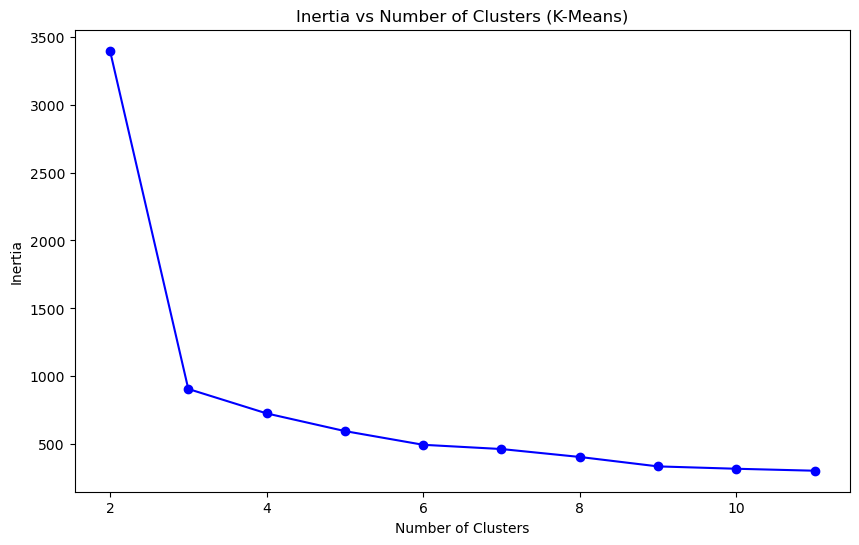

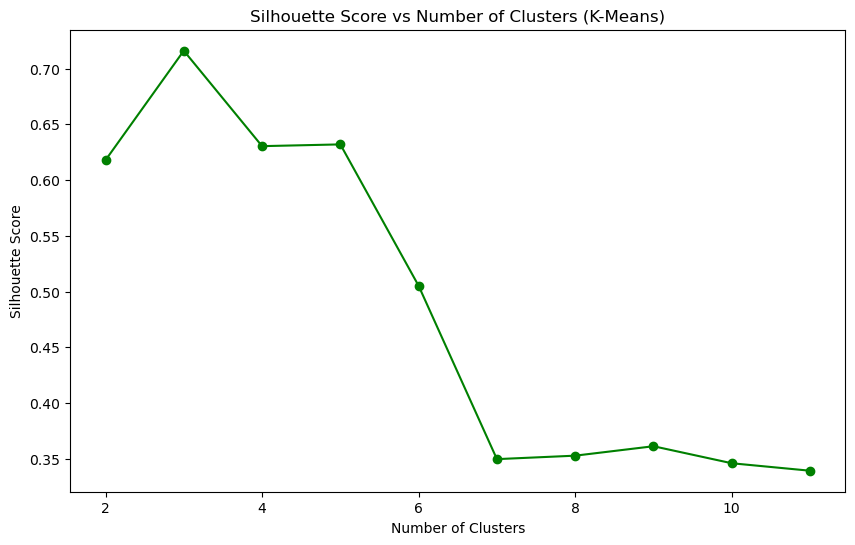

In [54]:
# Asumsi data_train sudah tersedia
X = data_train[['X1', 'X2']]  #  kolom fitur 

# Range jumlah cluster 
k_range = range(2, 12)
inertia = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Inertia (Within-cluster sum of squares)
    inertia.append(kmeans.inertia_)
    
    # Silhouette Score
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot Inertia
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', color='b', label='Inertia')
plt.title('Inertia vs Number of Clusters (K-Means)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', color='g', label='Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters (K-Means)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [55]:
#  nilai epsilon (eps) dan min_samples
eps_range = np.arange(0.1, 2.0, 0.1)  # Nilai epsilon
min_samples_range = range(1, 11)# Nilai min_samples

best_score = -1
best_eps = None
best_min_samples = None

# Grid search untuk epsilon dan min_samples
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        
        # Menghitung silhouette score
        if len(set(dbscan.labels_)) > 1:  # Hanya hitung jika ada lebih dari 1 cluster
            score = silhouette_score(X, dbscan.labels_)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Best Silhouette Score: {best_score}")
print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}")

Best Silhouette Score: 0.6695191938139697
Best eps: 1.4000000000000001, Best min_samples: 8


f:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
f:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
f:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
f:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

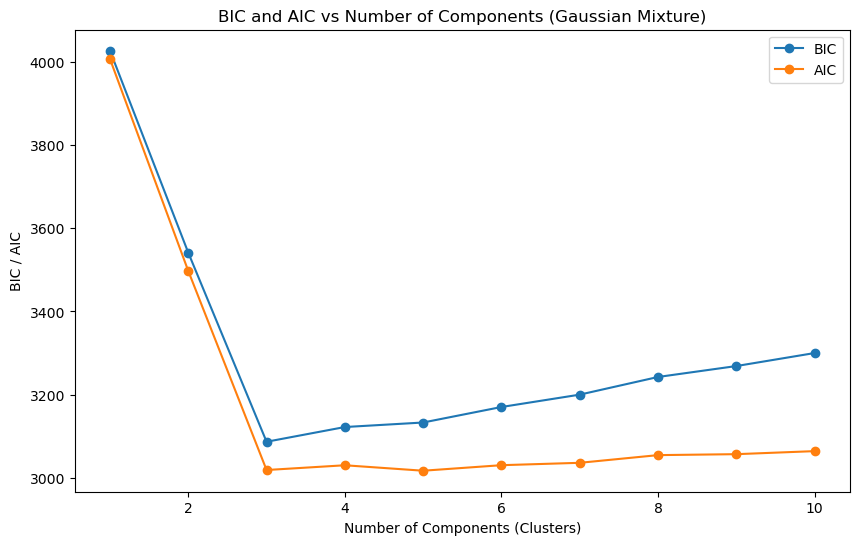

In [56]:
#  jumlah cluster
bic = []
aic = []
n_components_range = range(1, 11)

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X)
    
    # Hitung BIC dan AIC
    bic.append(gmm.bic(X))
    aic.append(gmm.aic(X))

# Plot BIC dan AIC
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bic, marker='o', label='BIC')
plt.plot(n_components_range, aic, marker='o', label='AIC')
plt.title('BIC and AIC vs Number of Components (Gaussian Mixture)')
plt.xlabel('Number of Components (Clusters)')
plt.ylabel('BIC / AIC')
plt.legend()
plt.show()

### 3. Lakukan process training kembali dengan jumlah cluster atau nilai epsilon (eps) dan minimal naigborhood yang telah ditentukan di point Kedua.

f:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


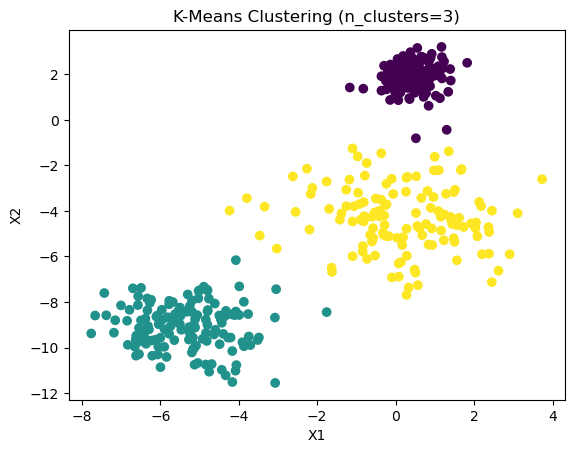

In [57]:
n_clusters = 3 #  jumlah cluster yang telah ditemukan sebelumnya

# Membuat model KMeans dengan jumlah cluster yang telah ditentukan
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Prediksi dan plot hasil
labels = kmeans.labels_

# Plot hasil clustering
plt.scatter(X['X1'], X['X2'], c=labels, cmap='viridis')
plt.title(f"K-Means Clustering (n_clusters={n_clusters})")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

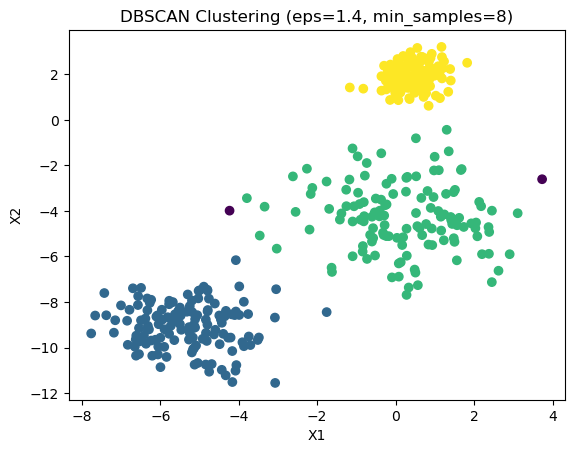

In [60]:
eps = 1.4# Sesuaikan dengan nilai eps yang telah ditemukan sebelumnya
min_samples = 8# Sesuaikan dengan nilai min_samples yang telah ditemukan sebelumnya

# Membuat model DBSCAN dengan epsilon dan min_samples yang telah ditentukan
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(X)

# Prediksi dan plot hasil
labels = dbscan.labels_

# Plot hasil clustering
plt.scatter(X['X1'], X['X2'], c=labels, cmap='viridis')
plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 4. Ploting hasil clastering dan analisis apakah pemilihan metode sudah tepat sesuai dengan karakteristik dataset kelompok masing-masing.

Analisis kesesuaian hasil clustering dengan metode unsupervised yang dipilih

Metode yang paling sesuai untuk menganalisis data dengan karakteristik seperti yang telah dijelaskan adalah K-Means. Metode ini mampu mengelompokkan data ke dalam beberapa cluster berdasarkan kemiripan karakteristik antar data, sehingga pola dan struktur tersembunyi dalam dataset dapat diidentifikasi dengan lebih mudah. Pendekatan ini sangat efektif dalam menangani data yang tidak memiliki label, karena K-Means menggunakan prinsip iteratif untuk meminimalkan jarak antar data dalam cluster yang sama dan memaksimalkan jarak antar cluster yang berbeda. Dengan demikian, K-Means dapat dianggap sebagai metode yang optimal untuk memproses data dengan karakteristik tersebut.








## Jawaban Analisis

K-Means merupakan metode yang paling tepat untuk menganalisis data dengan karakteristik yang telah dijelaskan. Metode ini bekerja dengan mengelompokkan data ke dalam beberapa cluster berdasarkan kesamaan fitur antar data, sehingga mempermudah pengenalan pola dan struktur tersembunyi dalam dataset. Pendekatan ini sangat cocok untuk data tanpa label, karena K-Means menggunakan algoritma iteratif untuk mengurangi jarak antar data dalam cluster yang sama sekaligus memperbesar jarak antar cluster yang berbeda. Dengan keunggulan tersebut, K-Means menjadi pilihan yang efektif untuk mengolah data dengan karakteristik seperti ini.

## 3. Dimentional Reduction dan ANN  (40%)

**Pengenalan Dataset**
Dataset ini diadaptasi dari COVID-19 Image Dataset yang awalnya berisi citra X-ray dada pasien. Dataset asli berfungsi untuk menganalisis dan mengklasifikasikan kondisi paru-paru ke dalam tiga kelas:

Link: https://telkomuniversityofficial-my.sharepoint.com/:x:/g/personal/istiqomah_telkomuniversity_ac_id/EaGXP3bMNYtEuwcz51IrjiwB_t0QAURDd3zCRy2OIpAfpA?e=6uLkAi

https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset

1. COVID: Citra X-ray pasien yang terdiagnosis COVID-19.
2. Viral Pneumonia: Citra X-ray pasien yang terdiagnosis pneumonia akibat virus selain COVID-19.
3. Normal: Citra X-ray pasien dengan kondisi paru-paru sehat.
Setelah dikonversi, dataset ini direpresentasikan dalam bentuk numerik, di mana setiap citra telah diubah menjadi array piksel berukuran 28x28, menghasilkan 784 fitur numerik. Dataset ini tetap mempertahankan kolom label untuk masing-masing kelas (COVID, Viral Pneumonia, Normal).

**Struktur Dataset**

Fitur (Features):
- Dataset ini memiliki 784 kolom fitur yang mewakili nilai intensitas piksel dari citra grayscale berukuran 28x28.
- Setiap kolom diberi nama Pixel_0, Pixel_1, ..., Pixel_783, yang mewakili intensitas piksel dari kiri atas ke kanan bawah citra.

**Label (Target):**

Dataset memiliki satu kolom target bernama Label dengan tiga kategori:
- 0: Normal
- 1: Viral Pneumonia
- 2: COVID-19

Ketentuan pertanyaan sesuai nomer kelompok untuk dimentional reduction:
1. Variansi 90%, berapakah komponen fitur yang dipertahankan?
2. Variansi 70%, berapakah komponen fitur yang dipertahankan?
3. Variansi 89%, berapakah komponen fitur yang dipertahankan?
4. Variansi 82%, berapakah komponen fitur yang dipertahankan?
5. Variansi 88%, berapakah komponen fitur yang dipertahankan?
6. Variansi 85%, berapakah komponen fitur yang dipertahankan?
7. Variansi 60%, berapakah komponen fitur yang dipertahankan?
8. Variansi 72%, berapakah komponen fitur yang dipertahankan?
9. Fitur yang dipertahankan 200, berapa persen variansinya?
10. Fitur yang dipertahankan 250, berapa persen variansinya?
11. Fitur yang dipertahankan 220, berapa persen variansinya?
12. Fitur yang dipertahankan 280, berapa persen variansinya?
13. Fitur yang dipertahankan 230, berapa persen variansinya?
14. Fitur yang dipertahankan 300, berapa persen variansinya?
15. Fitur yang dipertahankan 100, berapa persen variansinya?
16. Fitur yang dipertahankan 150, berapa persen variansinya?

In [35]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_train = pd.read_excel("labeled_dataset_with_pixels.xlsx")
X = data_train.drop(columns=['Label'])
y = data_train['Label']
#check data size
X.shape

(317, 784)

### 2. Training dengan menggunakan, Decision Tree, Random Forest, SVM dan ANN

Gunakan Decision Tree, Random Forest, SVM dan ANN untuk metode klasifikasi.  Training data yang belum  di reduce lalu bandingkan hasil classifikasinya menggunakan pengukuran performace (accurasi,recall, presisi dan lain-lain). tunning hyperparameter berulang kali atau gunakan gridsearchCV.

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Definisikan model Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Parameter untuk GridSearchCV
dt_param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
}

# Tuning hyperparameter menggunakan GridSearchCV
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
dt_grid_search.fit(X_train_scaled, y_train)

# Prediksi dan evaluasi
dt_best_model = dt_grid_search.best_estimator_
y_pred_dt = dt_best_model.predict(X_test_scaled)

In [39]:
rf = RandomForestClassifier(random_state=42)

# Parameter untuk GridSearchCV
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
}

# Tuning hyperparameter menggunakan GridSearchCV
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
rf_grid_search.fit(X_train_scaled, y_train)

# Prediksi dan evaluasi
rf_best_model = rf_grid_search.best_estimator_
y_pred_rf = rf_best_model.predict(X_test_scaled)

In [40]:
# Definisikan model SVM
svm = SVC(random_state=42)

# Parameter untuk GridSearchCV
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

# Tuning hyperparameter menggunakan GridSearchCV
svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
svm_grid_search.fit(X_train_scaled, y_train)

# Prediksi dan evaluasi
svm_best_model = svm_grid_search.best_estimator_
y_pred_svm = svm_best_model.predict(X_test_scaled)

In [41]:
# Definisikan model ANN
ann = MLPClassifier(random_state=42, max_iter=1000)

# Parameter untuk GridSearchCV
ann_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Tuning hyperparameter menggunakan GridSearchCV
ann_grid_search = GridSearchCV(ann, ann_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
ann_grid_search.fit(X_train_scaled, y_train)

# Prediksi dan evaluasi
ann_best_model = ann_grid_search.best_estimator_
y_pred_ann = ann_best_model.predict(X_test_scaled)

In [42]:
# Fungsi untuk evaluasi dan mencetak classification report
def evaluate_model(y_test, y_pred, model_name):
    print(f"Evaluasi {model_name}:")
    print("Akurasi:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Evaluasi untuk masing-masing model
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_ann, "ANN")

Evaluasi Decision Tree:
Akurasi: 0.796875
Precision: 0.8044871794871795
Recall: 0.796875
F1-Score: 0.7980113636363636

Classification Report:
                 precision    recall  f1-score   support

          Covid       0.88      0.79      0.84        29
         Normal       0.75      0.75      0.75        20
Viral Pneumonia       0.72      0.87      0.79        15

       accuracy                           0.80        64
      macro avg       0.79      0.80      0.79        64
   weighted avg       0.80      0.80      0.80        64

Evaluasi Random Forest:
Akurasi: 0.921875
Precision: 0.9251488095238095
Recall: 0.921875
F1-Score: 0.9221089182365796

Classification Report:
                 precision    recall  f1-score   support

          Covid       0.93      0.97      0.95        29
         Normal       0.86      0.90      0.88        20
Viral Pneumonia       1.00      0.87      0.93        15

       accuracy                           0.92        64
      macro avg       0.93 

### 3. Lakukan Dimentional Reduction dengan PCA sesuai dengan ketentuan pertanyaan masing-masing kelompok(30%)

fitting dengan PCA ganti hyperparameter berapa variansi yang diinginkan atau komponen yang ingin dipertahankan sesuai ketentuan diatas.

In [43]:
from sklearn.decomposition import PCA
import numpy as np

# Terapkan PCA pada data
pca = PCA(n_components=317) 
pca.fit(X)

# Hitung kumulatif variansi
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)



# 2. Variansi yang dijelaskan oleh 250 komponen pertama
variance_250 = cumulative_variance[249]  # Indeks ke-249 untuk 250 komponen
print(f"Variansi yang diperthanakanonen: {variance_250 * 100:.2f}%")


Variansi yang diperthanakanonen: 99.86%


#### Berapa komponen atau variansi yang dipertahankan?

253 data

### 4. Training kembali dengan menggunakan Decision Tree, Random Forest, SVM dan ANN dengan dimesi feature data yang sudah direduce? (20%)

Gunakan Decision Tree, Random Forest, SVM dan ANN untuk metode klasifikasi.  Training data yang sudah di reduce lalu bandingkan hasil classifikasinya menggunakan pengukuran performace (accurasi,recall, presisi dan lain-lain). tunning hyperparameter berulang kali atau gunakan gridsearchCV.

In [44]:
# Load dataset
data_train = pd.read_excel("labeled_dataset_with_pixels.xlsx")

# Pisahkan fitur dan label
X = data_train.drop(columns=['Label'])
y = data_train['Label']

# Split dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lakukan PCA untuk mengurangi dimensi fitur (20% fitur yang dipertahankan)
pca = PCA(n_components=0.99, random_state=42)  # Menggunakan 20% varian
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Dimensi data setelah PCA: {X_train_pca.shape}")

Dimensi data setelah PCA: (253, 151)


In [47]:
# Definisikan model Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Parameter untuk GridSearchCV
dt_param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
}

# Tuning hyperparameter menggunakan GridSearchCV
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
dt_grid_search.fit(X_train_pca, y_train)

# Prediksi dan evaluasi
dt_best_model = dt_grid_search.best_estimator_
y_pred_dt = dt_best_model.predict(X_test_pca)

In [48]:
# Definisikan model Random Forest
rf = RandomForestClassifier(random_state=42)

# Parameter untuk GridSearchCV
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
}

# Tuning hyperparameter menggunakan GridSearchCV
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
rf_grid_search.fit(X_train_pca, y_train)

# Prediksi dan evaluasi
rf_best_model = rf_grid_search.best_estimator_
y_pred_rf = rf_best_model.predict(X_test_pca)

In [49]:
# Definisikan model SVM
svm = SVC(random_state=42)

# Parameter untuk GridSearchCV
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

# Tuning hyperparameter menggunakan GridSearchCV
svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
svm_grid_search.fit(X_train_pca, y_train)

# Prediksi dan evaluasi
svm_best_model = svm_grid_search.best_estimator_
y_pred_svm = svm_best_model.predict(X_test_pca)

In [50]:
# Definisikan model ANN
ann = MLPClassifier(random_state=42, max_iter=1000)

# Parameter untuk GridSearchCV
ann_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Tuning hyperparameter menggunakan GridSearchCV
ann_grid_search = GridSearchCV(ann, ann_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
ann_grid_search.fit(X_train_pca, y_train)

# Prediksi dan evaluasi
ann_best_model = ann_grid_search.best_estimator_
y_pred_ann = ann_best_model.predict(X_test_pca)

In [51]:
# Fungsi untuk evaluasi dan mencetak classification report
def evaluate_model(y_test, y_pred, model_name):
    print(f"Evaluasi {model_name}:")
    print("Akurasi:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Evaluasi untuk masing-masing model
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_ann, "ANN")

Evaluasi Decision Tree:
Akurasi: 0.8125
Precision: 0.8118872549019608
Recall: 0.8125
F1-Score: 0.809083230958231

Classification Report:
                 precision    recall  f1-score   support

          Covid       0.86      0.86      0.86        29
         Normal       0.76      0.65      0.70        20
Viral Pneumonia       0.78      0.93      0.85        15

       accuracy                           0.81        64
      macro avg       0.80      0.82      0.80        64
   weighted avg       0.81      0.81      0.81        64

Evaluasi Random Forest:
Akurasi: 0.9375
Precision: 0.9397018251273344
Recall: 0.9375
F1-Score: 0.9376713085764811

Classification Report:
                 precision    recall  f1-score   support

          Covid       0.90      0.97      0.93        29
         Normal       0.95      0.90      0.92        20
Viral Pneumonia       1.00      0.93      0.97        15

       accuracy                           0.94        64
      macro avg       0.95      0.93

#### 5. (Analisis)Perbandingan kedua model dari 2 dataset (No 2 dan No 4) dengan pengukuran performace (accurasi,recall, presisi dan lain-lain).(30%)

Bandingkan apakah ada efek dari pengurangan dimensi yang dilakukan dengan PCA.

-Akurasi: Terdapat peningkatan yang cukup signifikan pada akurasi dari 0.7969 menjadi 0.8125. Hal ini menunjukkan bahwa penggunaan dimensionality reduction dengan PCA berhasil meningkatkan kinerja model dalam mengklasifikasikan data.

-Precision: Precision juga meningkat dari 0.8045 menjadi 0.8118. Ini berarti model lebih sedikit menghasilkan false positives setelah data direduksi dimensinya.

-Recall: Recall mengalami peningkatan dari 0.7969 menjadi 0.8125, menunjukkan bahwa model setelah reduksi dimensi lebih mampu menemukan dan mengklasifikasikan instance positif (benar-benar mengklasifikasikan lebih banyak contoh yang relevan).

-F1-Score: Peningkatan F1-Score dari 0.7980 menjadi 0.8091 menunjukkan bahwa baik Precision maupun Recall seimbang dalam peningkatan kinerja, yang mengarah pada pengukuran performa yang lebih baik secara keseluruhan.

Kesimpulan:
Pengurangan dimensi dengan PCA yang menghasilkan 253 fitur dari 784 fitur awal memiliki dampak positif terhadap kinerja model Decision Tree. Peningkatan pada akurasi, precision, recall, dan F1-Score menunjukkan bahwa teknik ini membantu model menjadi lebih efisien, tanpa mengorbankan kualitas prediksi. Ini bisa menunjukkan bahwa sebagian besar informasi penting dalam data ada pada sejumlah fitur yang lebih kecil setelah reduksi dimensi.